# Data from other sources - WIP

### Neuromorpho 

Neuromorpho.org is a jsp website.  
Scrape and download using selenium. 

In [1]:
# %load_ext autoreload
# %autoreload 2
# %matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from bs4 import BeautifulSoup as BS
import neuroncollector
import time

Connected to mongodb://localhost:27017/


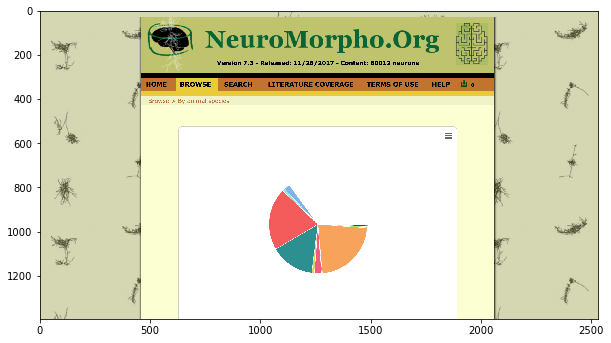

In [3]:
# initialize scraper
scraper = neuroncollector.NeuroScraper(browser="Firefox",machine='mac')

#access website
scraper.driver.get('http://neuromorpho.org/byspecies.jsp')

# get screenshot
scraper.driver.get_screenshot_as_file(filename='sc.png')
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [4]:
species = scraper.driver.find_elements_by_class_name('species')

# Total number of species in neuromorpho database:
len(species)

40

In [5]:
# Mouse data collection
scraper.driver.find_element_by_link_text('mouse')

# click on species:mouse 
scraper.driver.find_element_by_link_text('mouse').click()

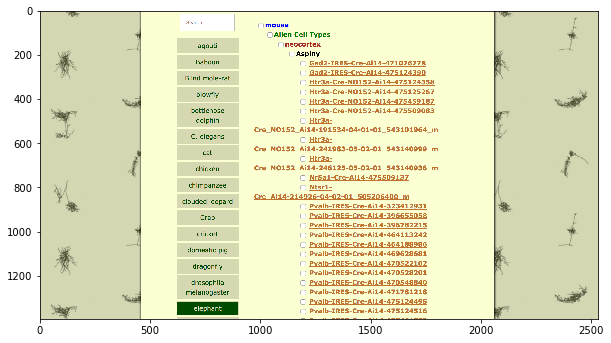

In [6]:
time.sleep(30) #wait for data to load on page

#get screenshot
scraper.driver.get_screenshot_as_file(filename='sc.png')
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [7]:
# `lvl2` is class name for data source (i.e. the contributors)
lvl2 = scraper.driver.find_elements_by_class_name('lvl2')

len(lvl2)

217

In [8]:
# optionally get the entire page for parsing and soupify
soup = BS(scraper.driver.page_source, "html.parser")

In [9]:
# get list of data sources
datasources = soup.findAll("font", {"class": "lvl2"})
source_name = [a.text for a in datasources]

In [10]:
# `lvl3` is label for brain regions
brain_region = soup.findAll("font", {"class": "lvl3"})

set([a.text for a in brain_region])

{u'Not reported',
 u'Olfactory Bulb',
 u'accessory olfactory bulb',
 u'amygdala',
 u'anterior olfactory nucleus',
 u'basal ganglia',
 u'brainstem',
 u'cerebellum',
 u'dorsal thalamus',
 u'entorhinal cortex',
 u'hippocampus',
 u'hypothalamus',
 u'main olfactory bulb',
 u'myelencephalon',
 u'neocortex',
 u'peripheral nervous system',
 u'retina',
 u'spinal cord',
 u'subiculum',
 u'thalamus',
 u'ventral striatum',
 u'ventral thalamus'}

In [11]:
#Neuron cell types!  
cell_types = soup.findAll("font", {"class": "lvl4"})

set([a.text for a in cell_types])  

{u'Aspiny',
 u'Back-Projecting',
 u'Cajal-Retzius',
 u'Cannabinoid receptor (CB1R)-positive',
 u'Chandelier',
 u'Excitatory',
 u'Fast-spiking',
 u'GABAergic',
 u'GAD65-expressing',
 u'Golgi',
 u'HICAP',
 u'HIPP',
 u'Induced Neurons',
 u'Inhibitory',
 u'Lugaro',
 u'MOPP',
 u'Martinotti',
 u'Motoneuron',
 u'Muscarinic-responsive',
 u'Neuroblast',
 u'Neuropeptide Y (NPY)-positive',
 u'Non-glutamatergic',
 u'Not reported',
 u'Oligodendrocyte',
 u'Parvalbumin (PV)-positive',
 u'Pseudounipolar',
 u'Purkinje',
 u'Pyramidal-like',
 u'Regulator of calcineurin 2 (Rcan2)-postive',
 u'Renshaw',
 u'Schaffer-collateral associated',
 u'Serotonin receptor type 3A (5-HT3)-positive',
 u'Somatostatin (SOM) containing cell',
 u'Somatostatin (SOM)-positive',
 u'Spiny',
 u'Total molecular layer projecting',
 u'Trilaminar',
 u'Vasoactive Intestinal Peptide (VIP)-positive',
 u'amacrine',
 u'astrocyte',
 u'axonless',
 u'basket',
 u'bipolar',
 u'bistratified',
 u'bitufted',
 u'deep projecting cell',
 u'deep sho

In [12]:
# individual neuron ids
neurons = soup.findAll("a", {"class": "screenshot"})

# Number of neurons
len(neurons)

17817

In [13]:
# Click to get meta data files
# scraper.driver.find_element_by_name('Sig').click()
scraper.driver.find_element_by_name('Aux').click()

In [24]:
for idnum in range(len(datasources))[130:]:
    scraper.driver.switch_to.window(scraper.driver.window_handles[0])
    print("{} - Clicking on {}".format(idnum,datasources[idnum].text))
    if idnum > 0: 
        scraper.driver.find_elements_by_id('mouse_chkbox')[idnum-1].click()
    scraper.driver.find_elements_by_id('mouse_chkbox')[idnum].click()
    # Get selected files 
    scraper.driver.find_element_by_xpath("//input[@value='Get SWC files of selected neurons']").click()
    time.sleep(5)
    scraper.driver.switch_to.window(scraper.driver.window_handles[1])
    time.sleep(10)
    scraper.driver.find_element_by_name('yes').click()
    time.sleep(20)
    scraper.driver.close()

Clicking on <font class="lvl2" id="lvl2"><img alt="" height="1" src="images/spacer.gif" width="25"><input id="mouse_chkbox" onclick="fnClickCheckbox(this)" type="checkbox" value="mouseKameda_Kaneko">Kameda_Kaneko</input></img></font>
Clicking on <font class="lvl2" id="lvl2"><img alt="" height="1" src="images/spacer.gif" width="25"><input id="mouse_chkbox" onclick="fnClickCheckbox(this)" type="checkbox" value="mouseKanatsou">Kanatsou</input></img></font>
Clicking on <font class="lvl2" id="lvl2"><img alt="" height="1" src="images/spacer.gif" width="25"><input id="mouse_chkbox" onclick="fnClickCheckbox(this)" type="checkbox" value="mouseKarlsson">Karlsson</input></img></font>
Clicking on <font class="lvl2" id="lvl2"><img alt="" height="1" src="images/spacer.gif" width="25"><input id="mouse_chkbox" onclick="fnClickCheckbox(this)" type="checkbox" value="mouseKatona">Katona</input></img></font>
Clicking on <font class="lvl2" id="lvl2"><img alt="" height="1" src="images/spacer.gif" width="25"

Clicking on <font class="lvl2" id="lvl2"><img alt="" height="1" src="images/spacer.gif" width="25"><input id="mouse_chkbox" onclick="fnClickCheckbox(this)" type="checkbox" value="mouseMasland">Masland</input></img></font>
Clicking on <font class="lvl2" id="lvl2"><img alt="" height="1" src="images/spacer.gif" width="25"><input id="mouse_chkbox" onclick="fnClickCheckbox(this)" type="checkbox" value="mouseMcBain">McBain</input></img></font>
Clicking on <font class="lvl2" id="lvl2"><img alt="" height="1" src="images/spacer.gif" width="25"><input id="mouse_chkbox" onclick="fnClickCheckbox(this)" type="checkbox" value="mouseMcQuiston">McQuiston</input></img></font>
Clicking on <font class="lvl2" id="lvl2"><img alt="" height="1" src="images/spacer.gif" width="25"><input id="mouse_chkbox" onclick="fnClickCheckbox(this)" type="checkbox" value="mouseMentis">Mentis</input></img></font>
Clicking on <font class="lvl2" id="lvl2"><img alt="" height="1" src="images/spacer.gif" width="25"><input id="mo

KeyboardInterrupt: 

In [25]:
[(i, a.text) for i, a in enumerate(datasources) if a.text== u'Nusser']

[(130, u'Nusser')]

In [23]:
scraper.driver.window_handles

[u'2147483649']

In [ ]:
# Todo: tidy up and create functions using notebook 